# Libraries

In [1]:
#Step 1: 
#importing the libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter
warnings.filterwarnings('ignore')

In [2]:
# to visualize and show charts
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
##feature engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
#from sklearn import 
#from xgboost import XGBRegressor


# Importing Data  

In [3]:
#step 2: Reading the dataset
train_bigmart_df=pd.read_csv('C:/Users/DELL/Desktop/ML/MyProject/Train.csv')
test_bigmart_df=pd.read_csv('C:/Users/DELL/Desktop/ML/MyProject/Test.csv')
train_bigmart_df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [4]:
test_bigmart_df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1


# Exploratory Data Analysis (EDA)

In [5]:
#printing information including the index dtype and columns, non-null values and memory usage.
#train dataset
train_bigmart_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
#test dataset
test_bigmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [7]:
#From .info() we can see that:
# Item_Weight and Outlet_Size in test and train data have non values.
#to solve this problem :
#Item_Weight: sense it is numaric I will replace it by the mean value.
#Outlet_Size: sense it is catagoric I will replace it by the mode value.

In [8]:
#Statistical measures about the data
train_bigmart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [9]:
test_bigmart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,4705.0,12.695633,4.664849,4.555,8.645000,12.500000,16.700000,21.350000
Item_Visibility,5681.0,0.065684,0.051252,0.000,0.027047,0.054154,0.093463,0.323637
Item_MRP,5681.0,141.023273,61.809091,31.990,94.412000,141.415400,186.026600,266.588400
Outlet_Establishment_Year,5681.0,1997.828903,8.372256,1985.000,1987.000000,1999.000000,2004.000000,2009.000000


In [10]:
#IN categorical variables we will see the number of unique values in each of them
train_bigmart_df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [11]:
# We can see that there is 1559 products and 10 outlets.

In [12]:
train_bigmart_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [13]:
#We can see that Item_Fat_Content values are :(Low Fat,Regular ,LF ,reg ,low fat)
#I'm gooing to replace it with :Low Fat , Regular (for visualization)
#I'm gooing to label it (for fitting the model)

In [14]:
train_bigmart_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [15]:
#We see that Item_Type have 16 different types of unique values and it is high number for categorical variable.
#Therefore I'm going to use "dummy variables".

In [16]:
train_bigmart_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [17]:
train_bigmart_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [18]:
train_bigmart_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

# Handling Missing data 

# Iteam_Weight is numarical column so we fit it with mean

In [19]:
#train dataset
train_bigmart_df['Item_Weight'].fillna(train_bigmart_df['Item_Weight'].mean(), inplace= True)
#test dataset
test_bigmart_df['Item_Weight'].fillna(train_bigmart_df['Item_Weight'].mean(), inplace= True)
print(train_bigmart_df['Item_Weight'].isnull().sum())
print(test_bigmart_df['Item_Weight'].isnull().sum())


0
0


# Outlet_Size is catagrical  column so we fit it with mode

In [20]:
#replace Outlet_Size with the mode of the Outlet_Size for the particular type of outlet.

In [21]:
#Train dataset
outlet_size_mode = train_bigmart_df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))
print(outlet_size_mode)

missing_values= train_bigmart_df['Outlet_Size'].isnull()
train_bigmart_df.loc[missing_values,'Outlet_Size']=train_bigmart_df.loc[missing_values,'Outlet_Type'].apply(lambda x:outlet_size_mode[x])
train_bigmart_df['Outlet_Size'].isnull().sum()


Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


0

In [22]:
#test dataset

outlet_size_mode1 = test_bigmart_df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))
print(outlet_size_mode)

#replace the missing value 
missing_values1= test_bigmart_df['Outlet_Size'].isnull()
test_bigmart_df.loc[missing_values1,'Outlet_Size']=test_bigmart_df.loc[missing_values1,'Outlet_Type'].apply(lambda x:outlet_size_mode[x])

test_bigmart_df['Outlet_Size'].isnull().sum()

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


0

# Handling zeros data

In [23]:
#replacing the '0' with the mean of Item_Visibility
#from the data description we see the min 0.000
#train dataset
train_bigmart_df.loc[:,'Item_Visibility'].replace([0],train_bigmart_df['Item_Visibility'].mean(),inplace=True)
print(sum(train_bigmart_df['Item_Visibility']==0))

#test dataset
test_bigmart_df.loc[:,'Item_Visibility'].replace([0],test_bigmart_df['Item_Visibility'].mean(),inplace=True)
print(sum(test_bigmart_df['Item_Visibility']==0))

0
0


# Analizing text data

In [24]:
train_bigmart_df['Item_Fat_Content']=train_bigmart_df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
train_bigmart_df['Item_Fat_Content'].value_counts()
#train_bigmart_df.head()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [25]:
test_bigmart_df['Item_Fat_Content']=test_bigmart_df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
test_bigmart_df['Item_Fat_Content'].value_counts()
#test_bigmart_df.head()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

# Data Visualization

# 1- Distribution of each variable.

In [26]:
#Distribution of the target variable:Item_Outlet_Sales

<function matplotlib.pyplot.show(close=None, block=None)>

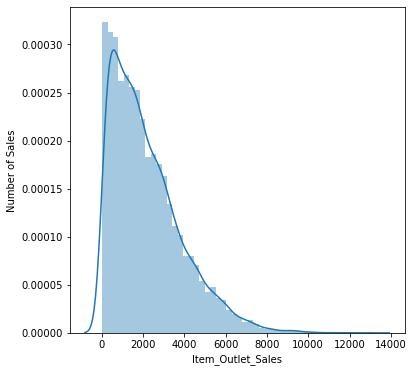

In [27]:

plt.figure(figsize=(6,6))
sns.distplot(train_bigmart_df['Item_Outlet_Sales'])
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.show

In [28]:
#Catigorical Fetures

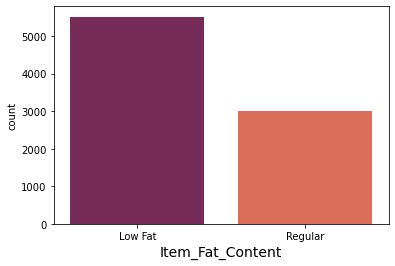

In [29]:
#Distribution of the variable:Item_Fat_Content

#Which product most sold the low fat or regular fat?
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=train_bigmart_df ,palette='rocket')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

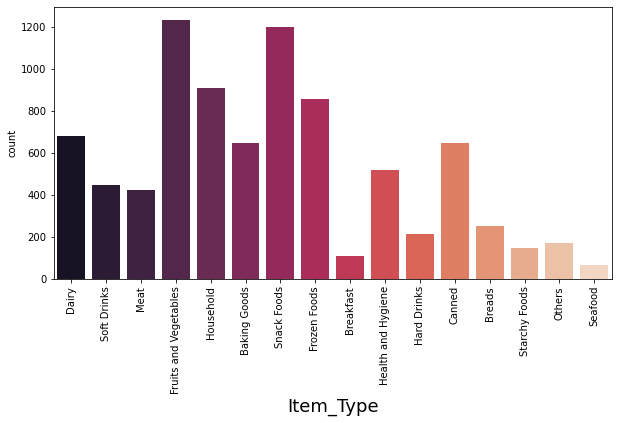

In [30]:
#Distribution of the variable: Item_Type

# What type of item has most sales?   
plt.figure(figsize=(10,5))
sns.countplot(x='Item_Type' , data=train_bigmart_df,palette='rocket' )
plt.xlabel('Item_Type', fontsize=18)
plt.xticks(rotation=90)
plt.show()

In [31]:
#from the plot we can see that Fruits and Vegetables ,Snack Foods and Household are more sold than the other items.

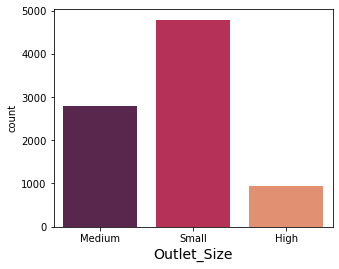

In [32]:
#Distribution of the variable:Outlet_Size

# what is the most common outlet size?
plt.figure(figsize=(5,4))
sns.countplot(x='Outlet_Size' , data=train_bigmart_df  ,palette='rocket')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

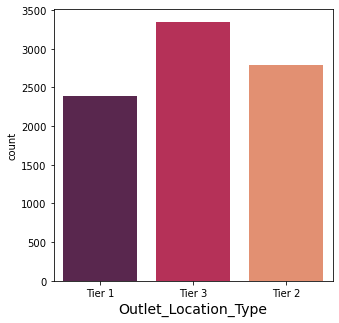

In [33]:
#Distribution of the variable:Outlet_Location_Type

#Where ara the most outlet located ?
plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Location_Type' , data=train_bigmart_df,palette='rocket')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

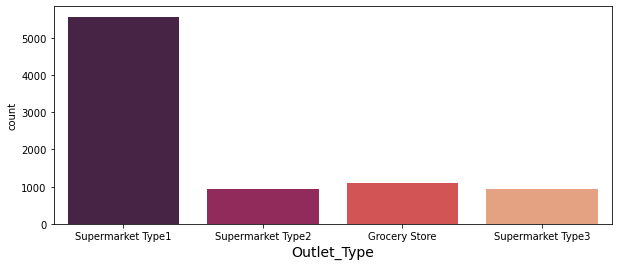

In [34]:
#Distribution of the variable :Outlet_Type
# What type of outlet has more sales?
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=train_bigmart_df ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

In [35]:
#Numerical fetures

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

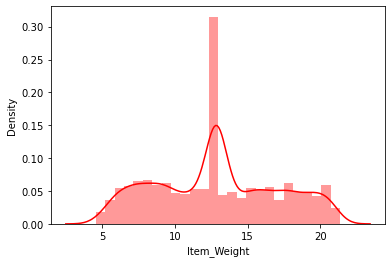

In [36]:
#item_weight distribution
plt.figure(figsize=None)
sns.distplot(train_bigmart_df['Item_Weight'],color='red')

#what is the avg weight of the products ? 

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

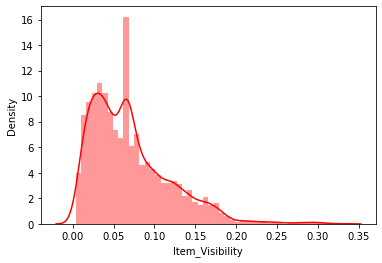

In [37]:
#Item_Visibility distribution
plt.figure(figsize=None)
sns.distplot(train_bigmart_df['Item_Visibility'],color='red')


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

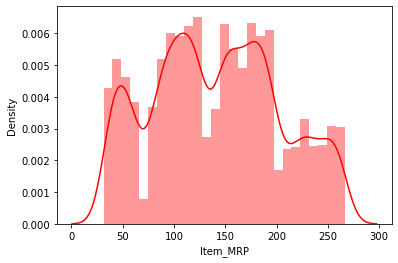

In [38]:
#Item_MRP distribution
plt.figure(figsize=None)
sns.distplot(train_bigmart_df['Item_MRP'],color='red')

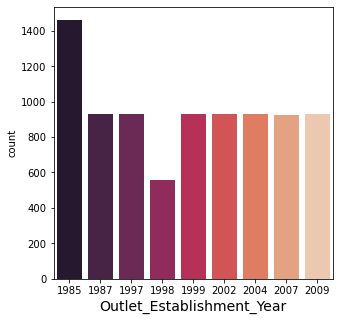

In [39]:
#Outlet_Establishment_Years distribution
plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Establishment_Year' , data=train_bigmart_df,palette='rocket')
plt.xlabel('Outlet_Establishment_Year', fontsize=14)
plt.show()

# 2-Check the relationship between the target variable and others.

In [40]:
#Categorical Variables

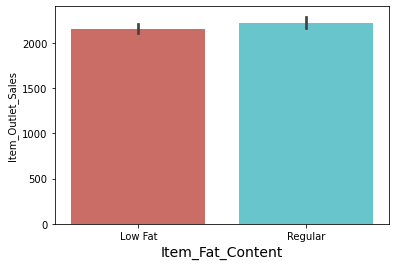

In [41]:
#Impact of Item_Fat_Content on Item_Outlet_Sales
sns.barplot('Item_Fat_Content' ,'Item_Outlet_Sales', data=train_bigmart_df,palette='hls' )
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()


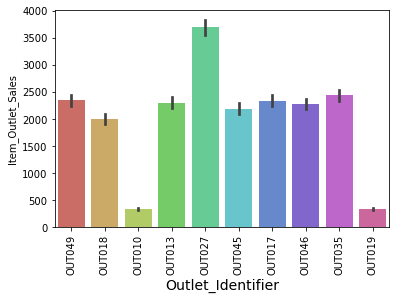

In [42]:

sns.barplot('Outlet_Identifier' ,'Item_Outlet_Sales', data=train_bigmart_df ,palette='hls')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.xticks(rotation=90)
plt.show()

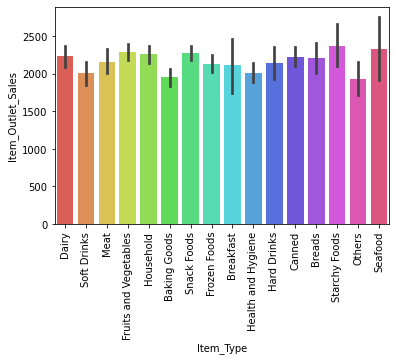

In [43]:
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=train_bigmart_df,palette='hls',saturation=8)
plt.xticks(rotation=90)
plt.show()


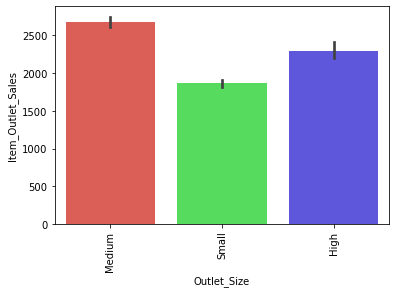

In [44]:
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train_bigmart_df,palette='hls',saturation=8)
plt.xticks(rotation=90)
plt.show()

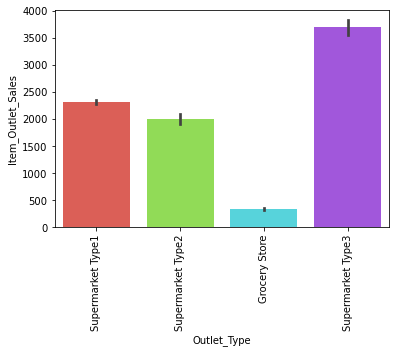

In [45]:
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train_bigmart_df,palette='hls',saturation=8)
plt.xticks(rotation=90)
plt.show()

In [46]:
# Plot all of the relationship between the target variable and the numirecal variable

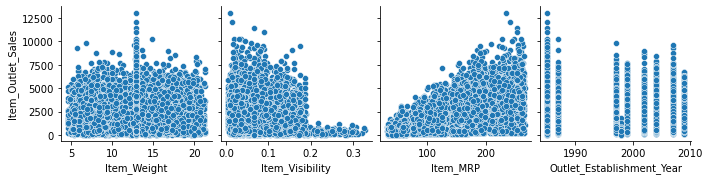

In [47]:
sns.pairplot(train_bigmart_df,x_vars=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year'],y_vars='Item_Outlet_Sales');

# Drop unnessasery features 

In [48]:
#drop Item_Identifier
train_bigmart_df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
test_bigmart_df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
test_bigmart_df.head(2)
#drop Outlet_Establishment_Year 
train_bigmart_df.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)
test_bigmart_df.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)
test_bigmart_df.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.75,Low Fat,0.007565,Snack Foods,107.8622,Medium,Tier 1,Supermarket Type1
1,8.30,Regular,0.038428,Dairy,87.3198,Small,Tier 2,Supermarket Type1


# Data Preprocessing 

In [49]:
#I have to convert catogrical columns to numarical values

le= LabelEncoder()
train_bigmart_df['Item_Fat_Content']=le.fit_transform(train_bigmart_df['Item_Fat_Content'])
train_bigmart_df['Item_Type']=le.fit_transform(train_bigmart_df['Item_Type'])
train_bigmart_df['Outlet_Size']=le.fit_transform(train_bigmart_df['Outlet_Size'])
train_bigmart_df['Outlet_Location_Type']=le.fit_transform(train_bigmart_df['Outlet_Location_Type'])
train_bigmart_df['Outlet_Type']=le.fit_transform(train_bigmart_df['Outlet_Type'])
train_bigmart_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1,0,1,2097.2700
3,19.20,1,0.066132,6,182.0950,2,2,0,732.3800
4,8.93,0,0.066132,9,53.8614,0,2,1,994.7052


In [72]:
test_bigmart_df['Item_Fat_Content']=le.fit_transform(test_bigmart_df['Item_Fat_Content'])
test_bigmart_df['Item_Type']=le.fit_transform(test_bigmart_df['Item_Type'])
test_bigmart_df['Outlet_Size']=le.fit_transform(test_bigmart_df['Outlet_Size'])
test_bigmart_df['Outlet_Location_Type']=le.fit_transform(test_bigmart_df['Outlet_Location_Type'])
test_bigmart_df['Outlet_Type']=le.fit_transform(test_bigmart_df['Outlet_Type'])
##add column 
test_bigmart_df['Item_Outlet_Sales']=0
test_bigmart_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,20.750000,0,0.007565,13,107.8622,1,0,1,0
1,8.300000,1,0.038428,4,87.3198,2,1,1,0
2,14.600000,0,0.099575,11,241.7538,2,2,0,0
3,7.315000,0,0.015388,13,155.0340,2,1,1,0
4,12.857645,1,0.118599,4,234.2300,1,2,3,0


# Corraltion Matrix

In [73]:
#check the correlation between Numerical variables and target variable:

In [74]:
#first get the numerical variables
num_features = train_bigmart_df.select_dtypes(include=[np.number])
num_features.dtypes

Item_Weight             float64
Item_Fat_Content          int32
Item_Visibility         float64
Item_Type                 int32
Item_MRP                float64
Outlet_Size               int32
Outlet_Location_Type      int32
Outlet_Type               int32
Item_Outlet_Sales       float64
dtype: object

In [75]:
#secound :check the Correlation
corr=num_features.corr()
corr

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.021157,-0.017450,0.028015,0.024756,-0.014105,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.021157,1.000000,0.049915,-0.139434,0.006063,-0.001262,-0.001598,0.002199,0.018719
Item_Visibility,-0.017450,0.049915,1.000000,-0.036000,-0.005259,0.097533,-0.027859,-0.179604,-0.134138
Item_Type,0.028015,-0.139434,-0.036000,1.000000,0.032651,-0.000218,0.003084,0.003053,0.017048
Item_MRP,0.024756,0.006063,-0.005259,0.032651,1.000000,0.000872,0.000232,-0.001975,0.567574
Outlet_Size,-0.014105,-0.001262,0.097533,-0.000218,0.000872,1.000000,-0.480075,-0.401373,-0.162753
Outlet_Location_Type,0.004088,-0.001598,-0.027859,0.003084,0.000232,-0.480075,1.000000,0.467219,0.089367
Outlet_Type,-0.000566,0.002199,-0.179604,0.003053,-0.001975,-0.401373,0.467219,1.000000,0.401522
Item_Outlet_Sales,0.011550,0.018719,-0.134138,0.017048,0.567574,-0.162753,0.089367,0.401522,1.000000


In [76]:
corr['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales       1.000000
Item_MRP                0.567574
Outlet_Type             0.401522
Outlet_Location_Type    0.089367
Item_Fat_Content        0.018719
Item_Type               0.017048
Item_Weight             0.011550
Item_Visibility        -0.134138
Outlet_Size            -0.162753
Name: Item_Outlet_Sales, dtype: float64

In [77]:
#we can see that Item_MRP have the most positive correlation and the Item_Visibility have the lowest correlation 
#with our target variable. 

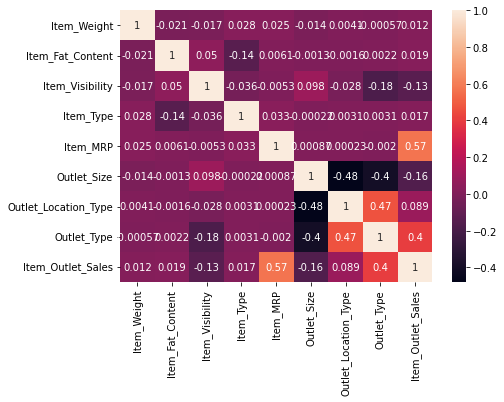

In [91]:
# Plot the correlations between the variables
plt.figure(figsize=(7,5))
sns.heatmap(train_bigmart_df.corr(),annot=True,)
plt.show()